In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams["figure.figsize"]=14,8
RANDOM_SEED = 42
LABELS = ["Subscribe","Not_Subscribe"]
#import imblearn         
#from imblearn.under_sampling import NearMiss
from collections import Counter
#from imblearn.combine import SMOTETomek


In [6]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [12]:
data = pd.read_csv("bank.csv",sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# There are no null values

In [16]:
data.groupby("y").mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [17]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [18]:
No = len(data[data.y=="no"])
Yes = len(data[data.y=="yes"])
Yes_Percent = (Yes/len(data["y"]))*100
No_Percent = (No/len(data["y"]))*100
print("percent of Yes:"+str(Yes_Percent))
print("percent of no:"+str(No_Percent))

percent of Yes:11.698480458295547
percent of no:88.30151954170445


Text(0, 0.5, 'Frequency')

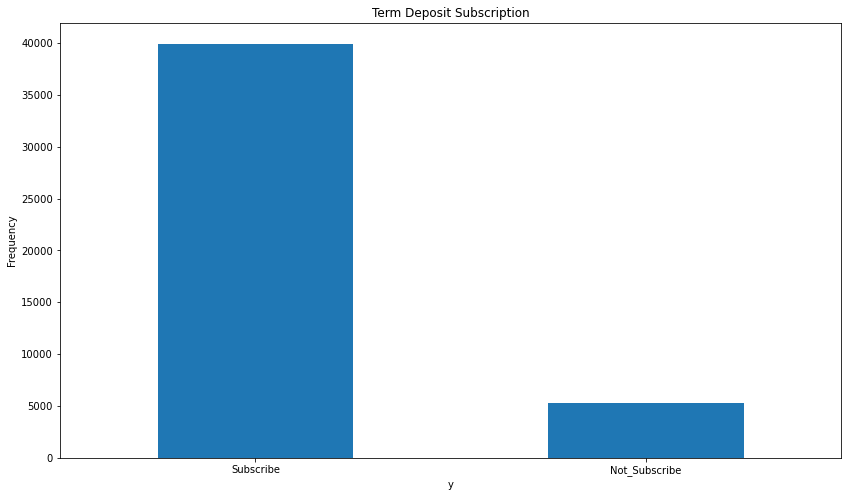

In [19]:
count_classes = pd.value_counts(data["y"],sort = True)
count_classes.plot(kind = "bar",rot = 0)
plt.title("Term Deposit Subscription")
plt.xticks(range(2),LABELS)
plt.xlabel("y")
plt.ylabel("Frequency")


In [20]:
Subscribe = data[data["y"]=="yes"]
Not_Subscribe = data[data['y']=='no']

In [21]:
print(Subscribe.shape,Not_Subscribe.shape)

(5289, 17) (39922, 17)


### checking behaviour of variables with target variables

#Age vs Target variable

<AxesSubplot:xlabel='age', ylabel='count'>

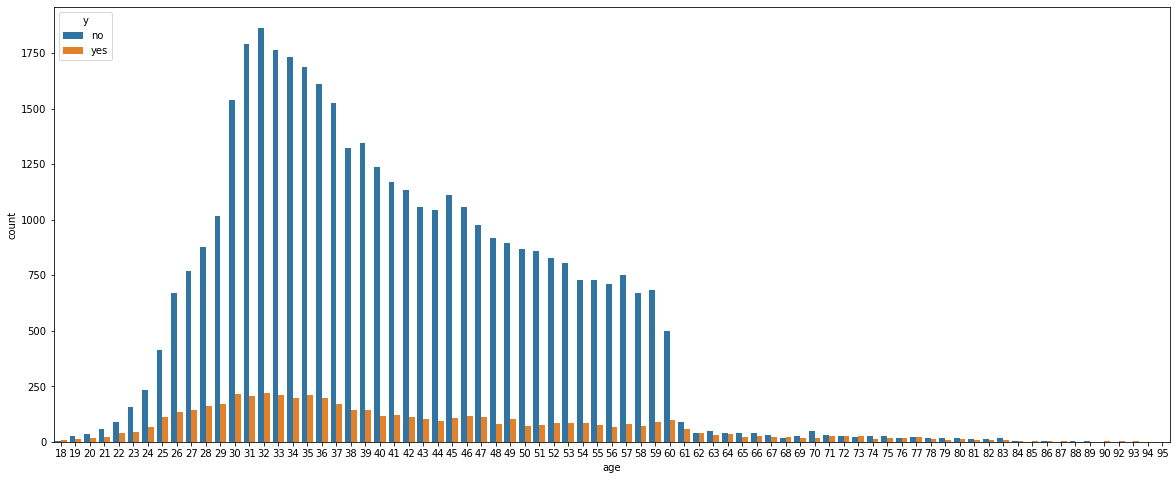

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x="age",data=data,hue="y")

#Job-Default

<AxesSubplot:xlabel='job', ylabel='count'>

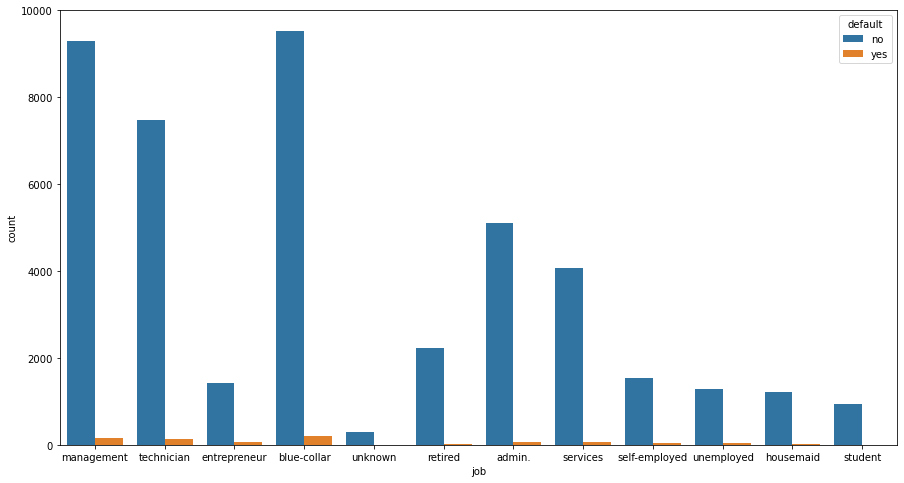

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x="job",data=data,hue="default")

Job-Housing Loan

<AxesSubplot:xlabel='job', ylabel='count'>

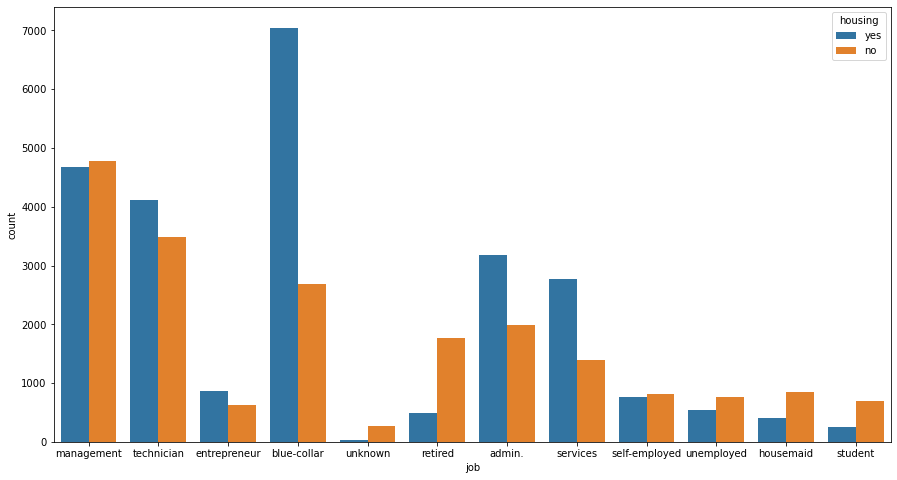

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x="job",data=data,hue="housing")

Job-loan

<AxesSubplot:xlabel='job', ylabel='count'>

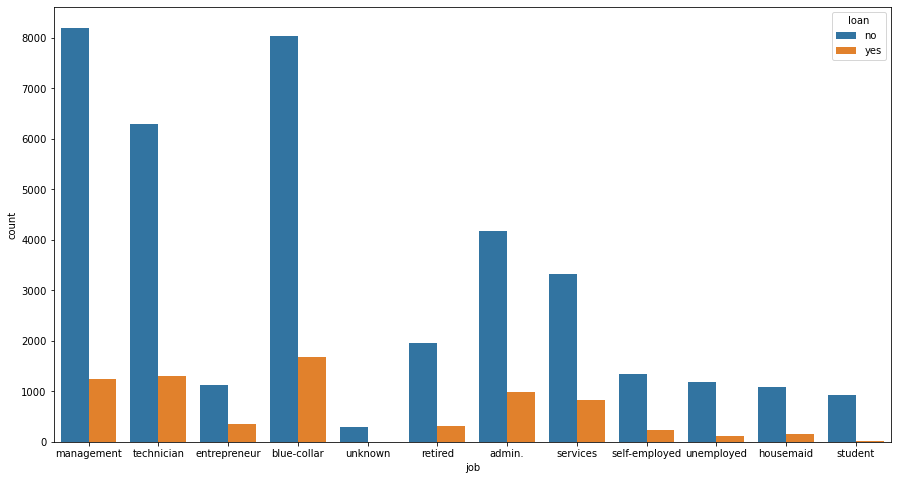

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x="job",data=data,hue="loan")

From the above graph,we can say that some people have taken housing and personal loan.

Job-Target variable

<AxesSubplot:xlabel='job', ylabel='count'>

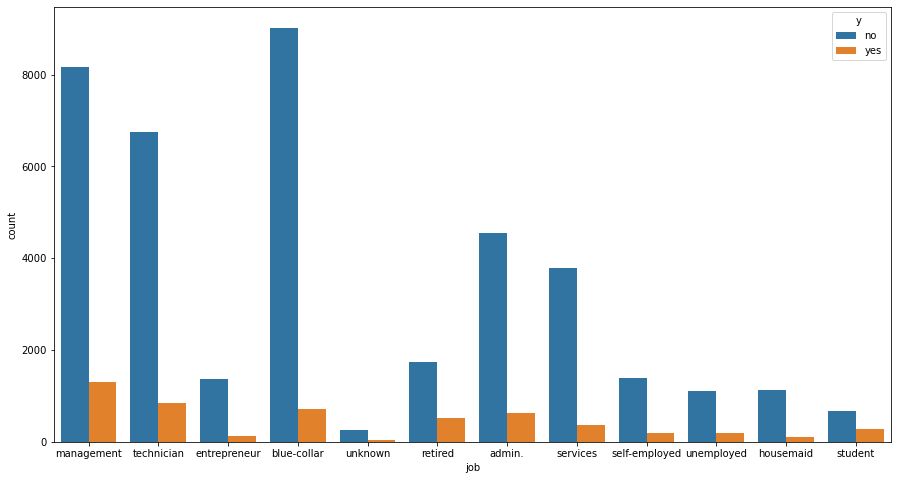

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x="job",data=data,hue="y")

Marital-Default

<AxesSubplot:xlabel='marital', ylabel='count'>

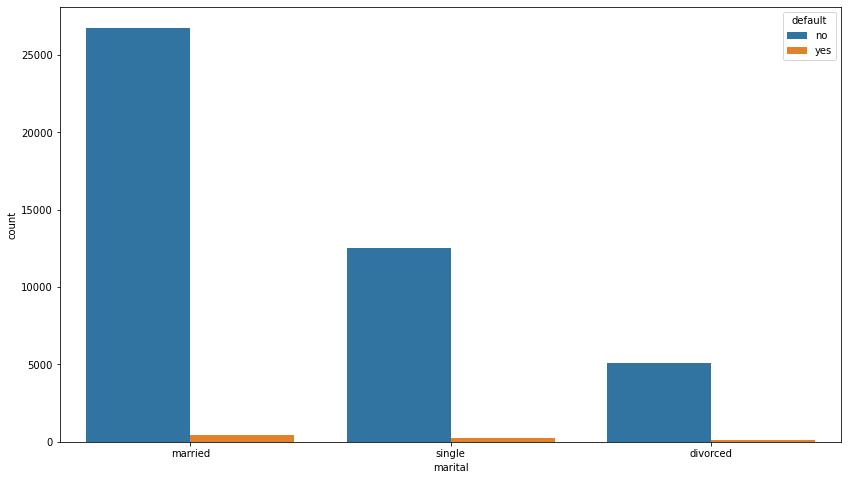

In [27]:
sns.countplot(x="marital",data=data,hue="default")

Marital-Housing Loan

<AxesSubplot:xlabel='marital', ylabel='count'>

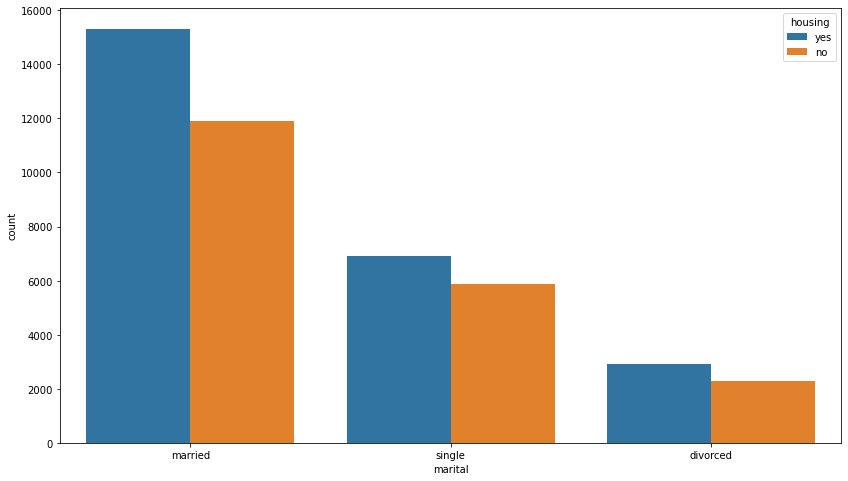

In [28]:
sns.countplot(x="marital",data=data,hue="housing")

Marital-Personal Loan

<AxesSubplot:xlabel='marital', ylabel='count'>

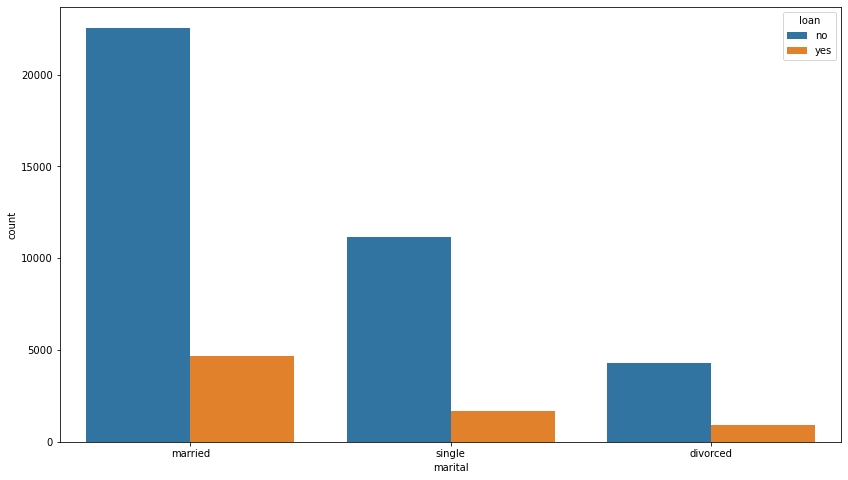

In [29]:
sns.countplot(x="marital",data=data,hue="loan")

Marital-Target Variable

<AxesSubplot:xlabel='marital', ylabel='count'>

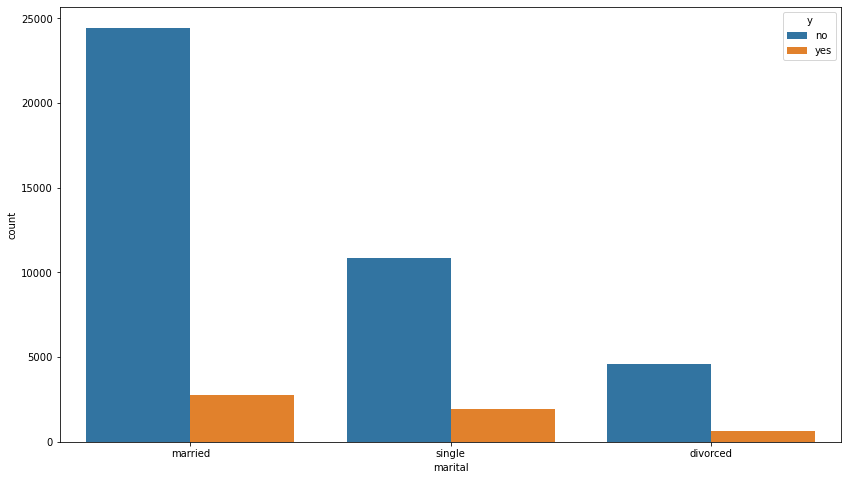

In [30]:
sns.countplot(x="marital",data=data,hue="y")

Education-Default

<AxesSubplot:xlabel='education', ylabel='count'>

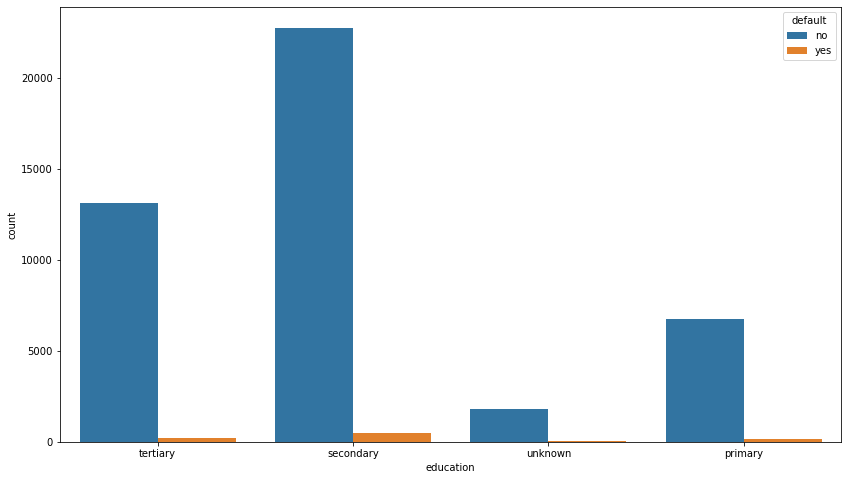

In [31]:
sns.countplot(x="education",data=data,hue='default')

Education-Personal Loan

<AxesSubplot:xlabel='education', ylabel='count'>

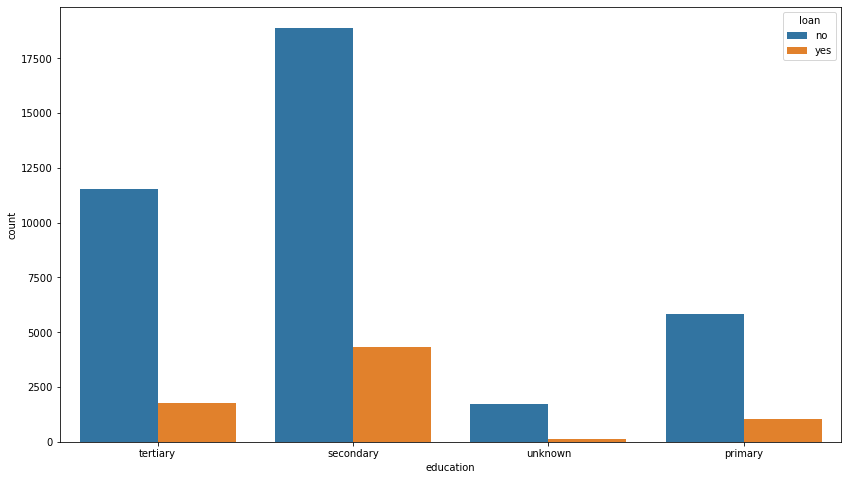

In [32]:
sns.countplot(x="education",data=data,hue="loan")

Education-Housing loan

<AxesSubplot:xlabel='education', ylabel='count'>

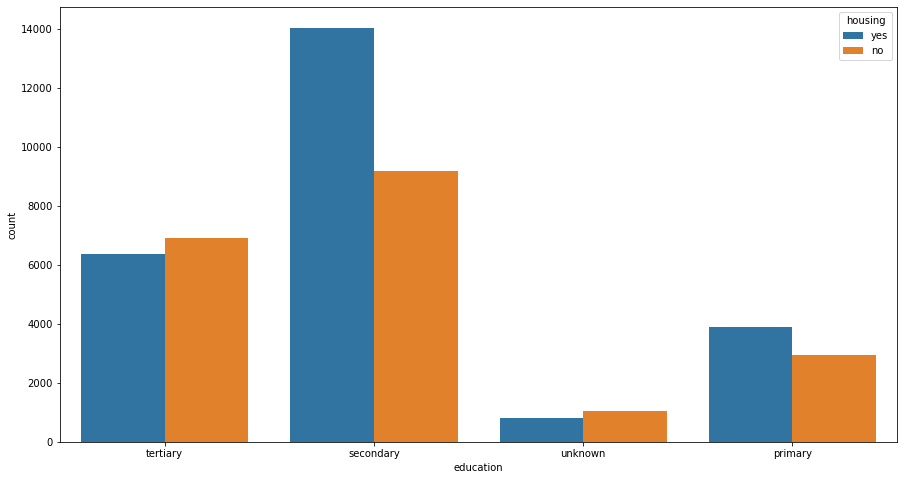

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(x="education",data=data,hue="housing")

From the above graph,we can see thet more teritiary and secondary educators prefers housing and personal loan

Education-Target Variable

<AxesSubplot:xlabel='education', ylabel='count'>

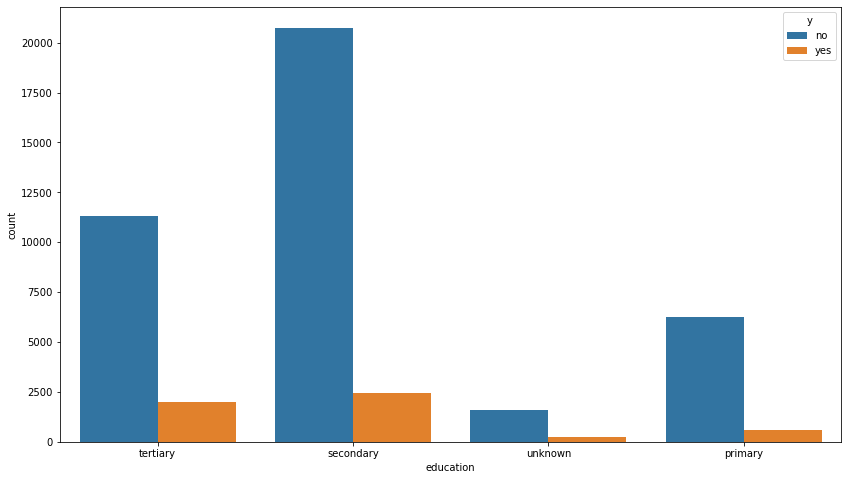

In [34]:
sns.countplot(x="education",data=data,hue="y")

In [36]:
#sns.pairplot(data=data,hue="y",vars=['age',"balance","day","duration"])

Correlation Mapping

<AxesSubplot:>

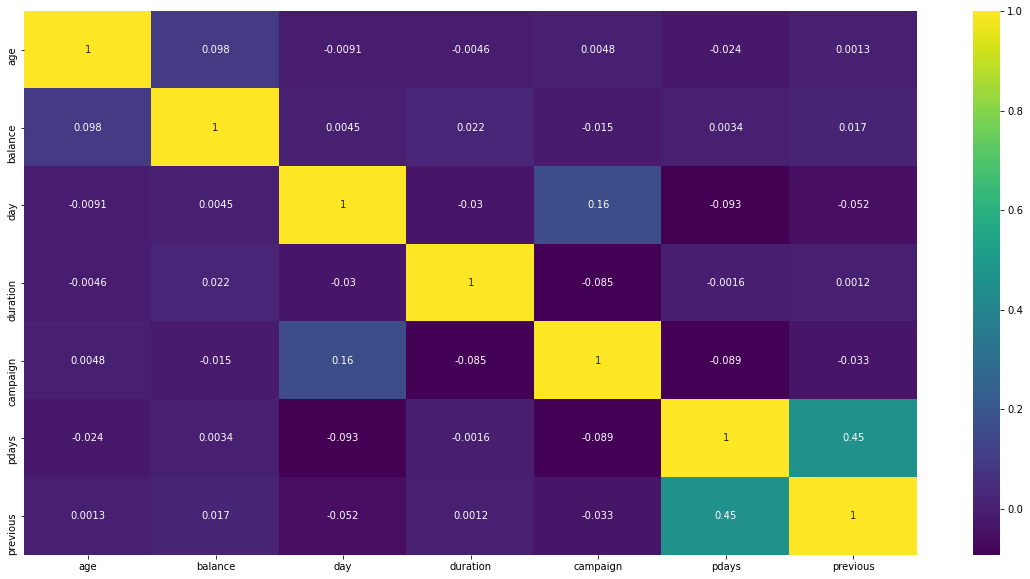

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data=data.corr(),annot=True,cmap="viridis")

Checking Outliers

<AxesSubplot:xlabel='y', ylabel='age'>

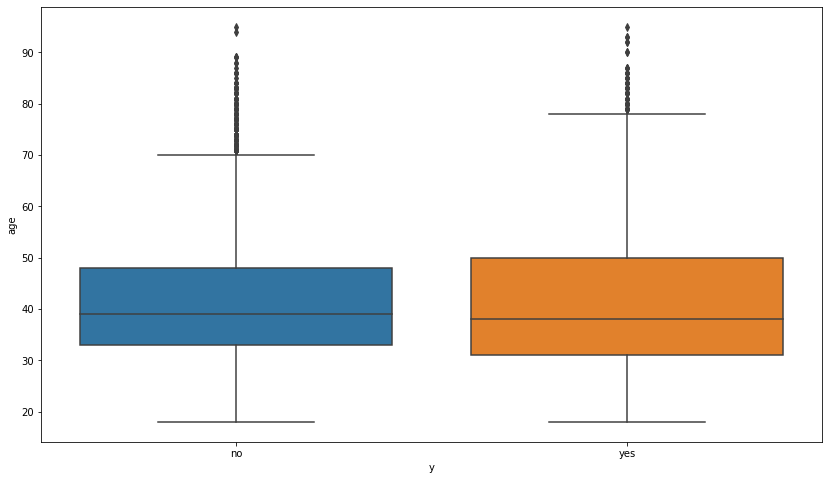

In [27]:
sns.boxplot(x="y",y="age",data=data)

<AxesSubplot:xlabel='y', ylabel='balance'>

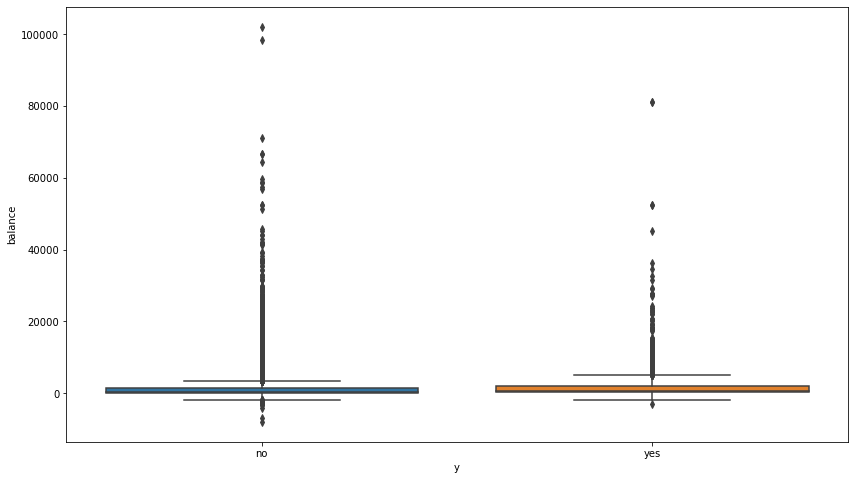

In [28]:
sns.boxplot(x="y",y="balance",data=data)

<AxesSubplot:xlabel='y', ylabel='duration'>

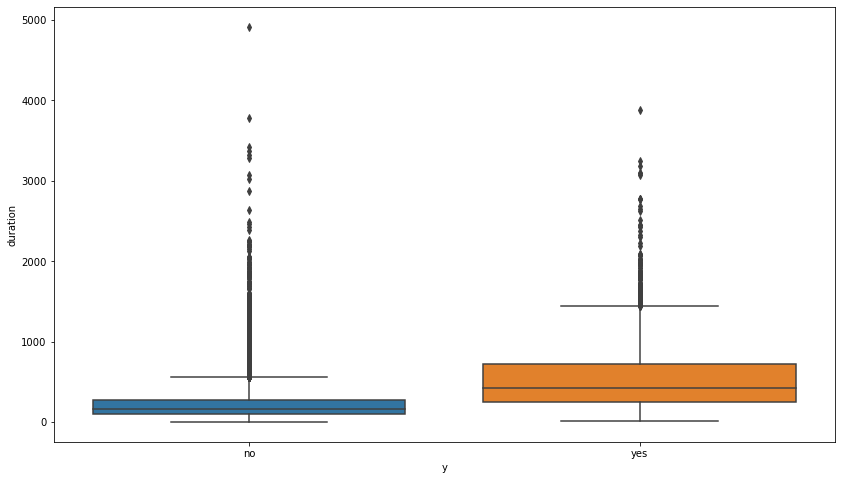

In [29]:
sns.boxplot(x="y",y="duration",data=data)

From the above boxplot,we can see more outliers.so,we can apply transformations

#Applying Transformations

<AxesSubplot:ylabel='Frequency'>

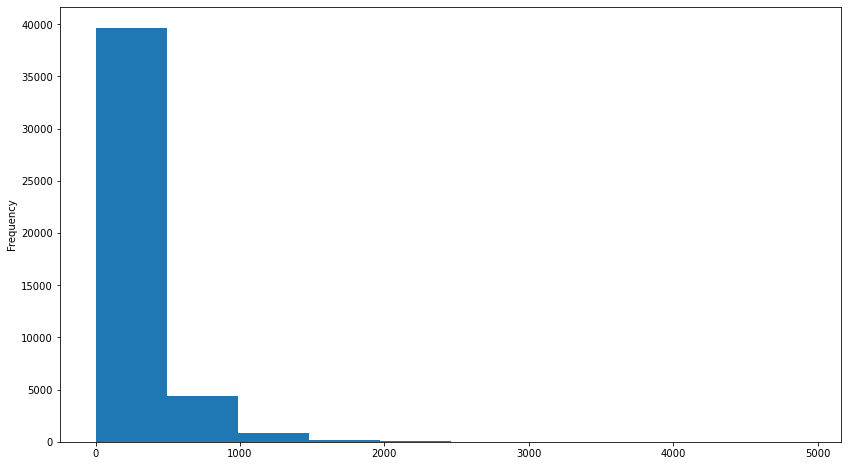

In [30]:
data["duration"].plot.hist()

In [37]:
from sklearn.preprocessing import PowerTransformer
bank=data.drop(["job","marital","education","default","campaign","housing","loan","contact","month","previous","poutcome","y"],axis=1)

In [38]:
bank

,age,balance,day,duration,pdays
0,58,2143,5,261,-1
1,44,29,5,151,-1
2,33,2,5,76,-1
3,47,1506,5,92,-1
4,33,1,5,198,-1
...,...,...,...,...,...
45206,51,825,17,977,-1
45207,71,1729,17,456,-1
45208,72,5715,17,1127,184
45209,57,668,17,508,-1


In [39]:
pt=PowerTransformer(method="yeo-johnson",standardize=True)
skl_yeojohnson=pt.fit(bank)
calc_lamdas=skl_yeojohnson.lambdas_
skl_yeojohnson=pt.transform(bank)
df_ptdata=pd.DataFrame(data=skl_yeojohnson,columns=['Age','Balance','Day','Duration','Pdays'])
df_ptdata.head()

,Age,Balance,Day,Duration,Pdays
0,1.473637,0.414773,-1.351873,0.386077,-0.472533
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533


Now,Data is tending towards normal distribution

<AxesSubplot:ylabel='Density'>

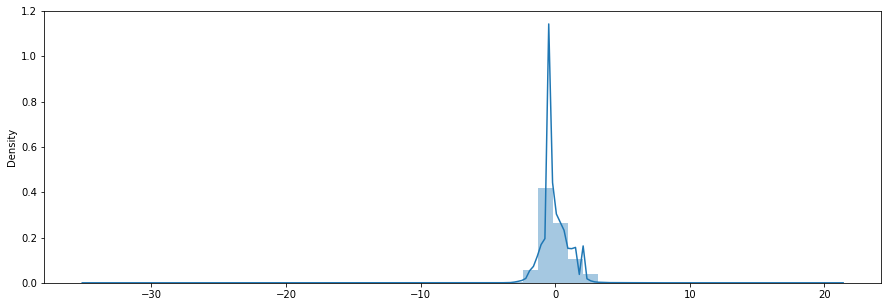

In [40]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
sns.distplot(df_ptdata)

<AxesSubplot:ylabel='Density'>

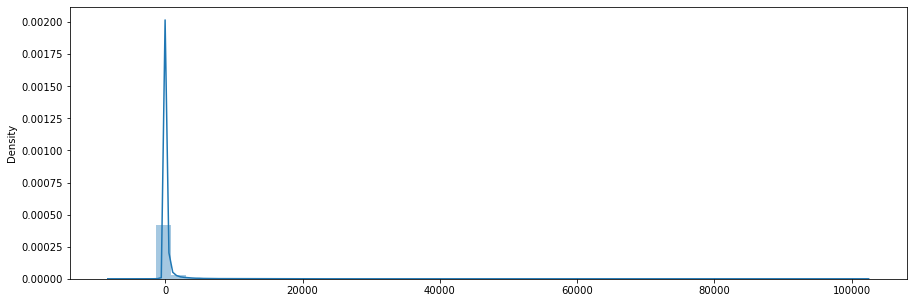

In [41]:
plt.figure(figsize=(15,5))
sns.distplot(bank)

In [78]:
DATA=pd.concat([df_ptdata,data],axis=1)
DATA

,Age,Balance,Day,Duration,Pdays,age,job,marital,education,default,...,duration,campaign,pdays,previous,poutcome,y,Job,Marital,Education,Month
0,1.473637,0.414773,-1.351873,0.386077,-0.472533,58,management,married,tertiary,no,...,261,1,-1,0,unknown,0,4,1,2,8
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533,44,technician,single,secondary,no,...,151,1,-1,0,unknown,0,9,2,1,8
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533,33,entrepreneur,married,secondary,no,...,76,1,-1,0,unknown,0,2,1,1,8
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533,47,blue-collar,married,unknown,no,...,92,1,-1,0,unknown,0,1,1,3,8
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533,33,unknown,single,unknown,no,...,198,1,-1,0,unknown,0,11,2,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.993503,-0.052398,0.220403,2.057767,-0.472533,51,technician,married,tertiary,no,...,977,3,-1,0,unknown,1,9,1,2,9
45207,2.207438,0.275122,0.220403,1.056254,-0.472533,71,retired,divorced,primary,no,...,456,2,-1,0,unknown,1,5,0,0,9
45208,2.257237,1.495765,0.220403,2.257271,2.122381,72,retired,married,secondary,no,...,1127,5,184,3,success,1,5,1,1,9
45209,1.409327,-0.114235,0.220403,1.191963,-0.472533,57,blue-collar,married,secondary,no,...,508,4,-1,0,unknown,0,1,1,1,9


In [79]:
c=DATA.drop(['age','balance','day','duration','pdays'],axis=1)
c

,Age,Balance,Day,Duration,Pdays,job,marital,education,default,housing,...,contact,month,campaign,previous,poutcome,y,Job,Marital,Education,Month
0,1.473637,0.414773,-1.351873,0.386077,-0.472533,management,married,tertiary,no,yes,...,unknown,may,1,0,unknown,0,4,1,2,8
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533,technician,single,secondary,no,yes,...,unknown,may,1,0,unknown,0,9,2,1,8
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533,entrepreneur,married,secondary,no,yes,...,unknown,may,1,0,unknown,0,2,1,1,8
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533,blue-collar,married,unknown,no,yes,...,unknown,may,1,0,unknown,0,1,1,3,8
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533,unknown,single,unknown,no,no,...,unknown,may,1,0,unknown,0,11,2,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.993503,-0.052398,0.220403,2.057767,-0.472533,technician,married,tertiary,no,no,...,cellular,nov,3,0,unknown,1,9,1,2,9
45207,2.207438,0.275122,0.220403,1.056254,-0.472533,retired,divorced,primary,no,no,...,cellular,nov,2,0,unknown,1,5,0,0,9
45208,2.257237,1.495765,0.220403,2.257271,2.122381,retired,married,secondary,no,no,...,cellular,nov,5,3,success,1,5,1,1,9
45209,1.409327,-0.114235,0.220403,1.191963,-0.472533,blue-collar,married,secondary,no,no,...,telephone,nov,4,0,unknown,0,1,1,1,9


Label Encoding on certain ordinal Data

In [80]:
label_encoder=preprocessing.LabelEncoder()

In [81]:
data['Job']=label_encoder.fit_transform(data['job'])

In [82]:
data['Marital']=label_encoder.fit_transform(data['marital'])

In [83]:
data['Education']=label_encoder.fit_transform(data['education'])

In [84]:
data['Month']=label_encoder.fit_transform(data['month'])

In [85]:
data['y']=label_encoder.fit_transform(data['y'])

In [86]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,Job,Marital,Education,Month
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,0,4,1,2,8
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,0,9,2,1,8
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,0,2,1,1,8
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,0,1,1,3,8
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,0,11,2,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,unknown,1,9,1,2,9
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,unknown,1,5,0,0,9
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1127,5,184,3,success,1,5,1,1,9
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,508,4,-1,0,unknown,0,1,1,1,9


In [87]:
label_data=data.drop(['age','job','marital','education','default','balance','housing','loan','contact','day','duration','campaign','pdays','previous','poutcome','month'],axis=1)
label_data

,y,Job,Marital,Education,Month
0,0,4,1,2,8
1,0,9,2,1,8
2,0,2,1,1,8
3,0,1,1,3,8
4,0,11,2,3,8
...,...,...,...,...,...
45206,1,9,1,2,9
45207,1,5,0,0,9
45208,1,5,1,1,9
45209,0,1,1,1,9


One hot encoding on certain non ordinal values

In [88]:
Dummy_DATA = pd.get_dummies(c,columns=['default','housing','loan','contact','poutcome'])
Dummy_DATA

,Age,Balance,Day,Duration,Pdays,job,marital,education,month,campaign,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.473637,0.414773,-1.351873,0.386077,-0.472533,management,married,tertiary,may,1,...,1,1,0,0,0,1,0,0,0,1
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533,technician,single,secondary,may,1,...,1,1,0,0,0,1,0,0,0,1
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533,entrepreneur,married,secondary,may,1,...,1,0,1,0,0,1,0,0,0,1
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533,blue-collar,married,unknown,may,1,...,1,1,0,0,0,1,0,0,0,1
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533,unknown,single,unknown,may,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.993503,-0.052398,0.220403,2.057767,-0.472533,technician,married,tertiary,nov,3,...,0,1,0,1,0,0,0,0,0,1
45207,2.207438,0.275122,0.220403,1.056254,-0.472533,retired,divorced,primary,nov,2,...,0,1,0,1,0,0,0,0,0,1
45208,2.257237,1.495765,0.220403,2.257271,2.122381,retired,married,secondary,nov,5,...,0,1,0,1,0,0,0,0,1,0
45209,1.409327,-0.114235,0.220403,1.191963,-0.472533,blue-collar,married,secondary,nov,4,...,0,1,0,0,1,0,0,0,0,1


In [89]:
Dummy_Variables = Dummy_DATA.drop(['Age','Balance','Day','Duration','Pdays','job','marital','education','month','campaign','previous','y'],axis=1)
Dummy_Variables

,Job,Marital,Education,Month,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,4,1,2,8,1,0,0,1,1,0,0,0,1,0,0,0,1
1,9,2,1,8,1,0,0,1,1,0,0,0,1,0,0,0,1
2,2,1,1,8,1,0,0,1,0,1,0,0,1,0,0,0,1
3,1,1,3,8,1,0,0,1,1,0,0,0,1,0,0,0,1
4,11,2,3,8,1,0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,9,1,0,1,0,1,0,1,0,0,0,0,0,1
45207,5,0,0,9,1,0,1,0,1,0,1,0,0,0,0,0,1
45208,5,1,1,9,1,0,1,0,1,0,1,0,0,0,0,1,0
45209,1,1,1,9,1,0,1,0,1,0,0,1,0,0,0,0,1


In [90]:
Nondummy_DATA = Dummy_DATA.drop(['housing_no','housing_yes','loan_no','loan_yes','contact_cellular','contact_telephone','contact_unknown','poutcome_failure','poutcome_other','poutcome_success','poutcome_unknown','y'],axis=1)
Nondummy_DATA

,Age,Balance,Day,Duration,Pdays,job,marital,education,month,campaign,previous,Job,Marital,Education,Month,default_no,default_yes
0,1.473637,0.414773,-1.351873,0.386077,-0.472533,management,married,tertiary,may,1,0,4,1,2,8,1,0
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533,technician,single,secondary,may,1,0,9,2,1,8,1,0
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533,entrepreneur,married,secondary,may,1,0,2,1,1,8,1,0
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533,blue-collar,married,unknown,may,1,0,1,1,3,8,1,0
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533,unknown,single,unknown,may,1,0,11,2,3,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.993503,-0.052398,0.220403,2.057767,-0.472533,technician,married,tertiary,nov,3,0,9,1,2,9,1,0
45207,2.207438,0.275122,0.220403,1.056254,-0.472533,retired,divorced,primary,nov,2,0,5,0,0,9,1,0
45208,2.257237,1.495765,0.220403,2.257271,2.122381,retired,married,secondary,nov,5,3,5,1,1,9,1,0
45209,1.409327,-0.114235,0.220403,1.191963,-0.472533,blue-collar,married,secondary,nov,4,0,1,1,1,9,1,0


In [91]:
final_data=pd.concat([Dummy_Variables,Nondummy_DATA,label_data],axis=1)
final_data

,Job,Marital,Education,Month,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,...,Marital,Education,Month,default_no,default_yes,y,Job,Marital,Education,Month
0,4,1,2,8,1,0,0,1,1,0,...,1,2,8,1,0,0,4,1,2,8
1,9,2,1,8,1,0,0,1,1,0,...,2,1,8,1,0,0,9,2,1,8
2,2,1,1,8,1,0,0,1,0,1,...,1,1,8,1,0,0,2,1,1,8
3,1,1,3,8,1,0,0,1,1,0,...,1,3,8,1,0,0,1,1,3,8
4,11,2,3,8,1,0,1,0,1,0,...,2,3,8,1,0,0,11,2,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,9,1,0,1,0,1,0,...,1,2,9,1,0,1,9,1,2,9
45207,5,0,0,9,1,0,1,0,1,0,...,0,0,9,1,0,1,5,0,0,9
45208,5,1,1,9,1,0,1,0,1,0,...,1,1,9,1,0,1,5,1,1,9
45209,1,1,1,9,1,0,1,0,1,0,...,1,1,9,1,0,0,1,1,1,9


In [92]:
final_data.shape

(45211, 39)

In [93]:
final_cleaned_data=final_data.drop(['job', 'marital', 'education', 'month'],axis=1)
final_cleaned_data.shape

(45211, 35)

In [94]:
final_cleaned_data.columns

Index(['Job', 'Marital', 'Education', 'Month', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'Age',
       'Balance', 'Day', 'Duration', 'Pdays', 'campaign', 'previous', 'Job',
       'Marital', 'Education', 'Month', 'default_no', 'default_yes', 'y',
       'Job', 'Marital', 'Education', 'Month'],
      dtype='object')

In [95]:
final_cleaned_data

,Job,Marital,Education,Month,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,...,Marital,Education,Month,default_no,default_yes,y,Job,Marital,Education,Month
0,4,1,2,8,1,0,0,1,1,0,...,1,2,8,1,0,0,4,1,2,8
1,9,2,1,8,1,0,0,1,1,0,...,2,1,8,1,0,0,9,2,1,8
2,2,1,1,8,1,0,0,1,0,1,...,1,1,8,1,0,0,2,1,1,8
3,1,1,3,8,1,0,0,1,1,0,...,1,3,8,1,0,0,1,1,3,8
4,11,2,3,8,1,0,1,0,1,0,...,2,3,8,1,0,0,11,2,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,9,1,0,1,0,1,0,...,1,2,9,1,0,1,9,1,2,9
45207,5,0,0,9,1,0,1,0,1,0,...,0,0,9,1,0,1,5,0,0,9
45208,5,1,1,9,1,0,1,0,1,0,...,1,1,9,1,0,1,5,1,1,9
45209,1,1,1,9,1,0,1,0,1,0,...,1,1,9,1,0,0,1,1,1,9


Our Model is to be built with 25 Columns where 5 Columns undergo One Hot Encoding and 4 Columns undergo Label Encoding¶


In [105]:
X = final_cleaned_data.iloc[:,final_cleaned_data.columns != 'y']
X

,Job,Marital,Education,Month,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,...,Job,Marital,Education,Month,default_no,default_yes,Job,Marital,Education,Month
0,4,1,2,8,1,0,0,1,1,0,...,4,1,2,8,1,0,4,1,2,8
1,9,2,1,8,1,0,0,1,1,0,...,9,2,1,8,1,0,9,2,1,8
2,2,1,1,8,1,0,0,1,0,1,...,2,1,1,8,1,0,2,1,1,8
3,1,1,3,8,1,0,0,1,1,0,...,1,1,3,8,1,0,1,1,3,8
4,11,2,3,8,1,0,1,0,1,0,...,11,2,3,8,1,0,11,2,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,9,1,0,1,0,1,0,...,9,1,2,9,1,0,9,1,2,9
45207,5,0,0,9,1,0,1,0,1,0,...,5,0,0,9,1,0,5,0,0,9
45208,5,1,1,9,1,0,1,0,1,0,...,5,1,1,9,1,0,5,1,1,9
45209,1,1,1,9,1,0,1,0,1,0,...,1,1,1,9,1,0,1,1,1,9


In [106]:
Y = final_cleaned_data['y']

In [107]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [108]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [111]:
classifier=LogisticRegression(solver='liblinear')

In [112]:
classifier.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [113]:
classifier.coef_

array([[ 1.18026181e-03,  3.78173382e-02,  5.25686217e-02,
         8.38904062e-03, -4.21979885e-01, -5.33992922e-01,
        -3.54400667e-02, -9.20532740e-01, -2.00367640e-01,
        -7.55605167e-01,  5.71932534e-02,  1.37486937e-01,
        -1.15065300e+00, -1.04224537e+00, -7.76514744e-01,
         1.28051407e+00, -4.17726763e-01, -3.54141349e-02,
         7.82782672e-02, -3.46468367e-02,  1.50066024e+00,
         3.67976467e-01, -8.20351842e-02,  6.26659393e-03,
         1.18026181e-03,  3.78173382e-02,  5.25686217e-02,
         8.38904062e-03, -4.21979885e-01, -5.33992922e-01,
         1.18026181e-03,  3.78173382e-02,  5.25686217e-02,
         8.38904062e-03]])

In [114]:
classifier.predict_proba(X_test)

array([[0.98563563, 0.01436437],
       [0.9897155 , 0.0102845 ],
       [0.93092224, 0.06907776],
       ...,
       [0.98691338, 0.01308662],
       [0.99433321, 0.00566679],
       [0.97431444, 0.02568556]])

In [115]:
y_pred=classifier.predict(X)
final_cleaned_data['y_pred']=y_pred
final_cleaned_data

,Job,Marital,Education,Month,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,...,Education,Month,default_no,default_yes,y,Job,Marital,Education,Month,y_pred
0,4,1,2,8,1,0,0,1,1,0,...,2,8,1,0,0,4,1,2,8,0
1,9,2,1,8,1,0,0,1,1,0,...,1,8,1,0,0,9,2,1,8,0
2,2,1,1,8,1,0,0,1,0,1,...,1,8,1,0,0,2,1,1,8,0
3,1,1,3,8,1,0,0,1,1,0,...,3,8,1,0,0,1,1,3,8,0
4,11,2,3,8,1,0,1,0,1,0,...,3,8,1,0,0,11,2,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,9,1,0,1,0,1,0,...,2,9,1,0,1,9,1,2,9,1
45207,5,0,0,9,1,0,1,0,1,0,...,0,9,1,0,1,5,0,0,9,0
45208,5,1,1,9,1,0,1,0,1,0,...,1,9,1,0,1,5,1,1,9,1
45209,1,1,1,9,1,0,1,0,1,0,...,1,9,1,0,0,1,1,1,9,0


In [116]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))

In [117]:
new_df = pd.concat([final_cleaned_data,y_prob],axis=1)
new_df

,Job,Marital,Education,Month,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,...,default_no,default_yes,y,Job,Marital,Education,Month,y_pred,0,1
0,4,1,2,8,1,0,0,1,1,0,...,1,0,0,4,1,2,8,0,0.970524,0.029476
1,9,2,1,8,1,0,0,1,1,0,...,1,0,0,9,2,1,8,0,0.988598,0.011402
2,2,1,1,8,1,0,0,1,0,1,...,1,0,0,2,1,1,8,0,0.997911,0.002089
3,1,1,3,8,1,0,0,1,1,0,...,1,0,0,1,1,3,8,0,0.993436,0.006564
4,11,2,3,8,1,0,1,0,1,0,...,1,0,0,11,2,3,8,0,0.941161,0.058839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,9,1,0,1,0,1,0,...,1,0,1,9,1,2,9,1,0.286578,0.713422
45207,5,0,0,9,1,0,1,0,1,0,...,1,0,1,5,0,0,9,0,0.724963,0.275037
45208,5,1,1,9,1,0,1,0,1,0,...,1,0,1,5,1,1,9,1,0.025986,0.974014
45209,1,1,1,9,1,0,1,0,1,0,...,1,0,0,1,1,1,9,0,0.644410,0.355590


In [118]:
pd.crosstab(Y,y_pred)

col_0,0,1
y,,
0,38962,960
1,3563,1726


In [119]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.64      0.33      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.89     45211



In [120]:
logit_roc_score=roc_auc_score(Y,classifier.predict(X))

In [121]:
logit_roc_score

0.6511453952715831